In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [74]:
data = pd.read_excel(r"C:\Users\kriti\kriti python\Hourly Patient Data.xlsx")

In [75]:
data['Time'] = pd.to_datetime(data['Time'])

In [76]:
data.set_index('Time', inplace=True)

In [77]:
data.drop(columns=['ESI 1', 'ESI 2', 'ESI 3', 'ESI 4'], inplace=True)

In [78]:
esi1_daily = data['ESI 5'].resample('D').sum()

In [79]:
esi1_daily_df = esi1_daily.reset_index()

In [80]:
esi1_daily_df.columns = ['Date', 'ESI 5']

In [81]:
print(esi1_daily_df)

           Date  ESI 5
0    2017-01-01      2
1    2017-01-02      2
2    2017-01-03      4
3    2017-01-04      3
4    2017-01-05      1
...         ...    ...
1456 2020-12-27      5
1457 2020-12-28      8
1458 2020-12-29      9
1459 2020-12-30      8
1460 2020-12-31      3

[1461 rows x 2 columns]


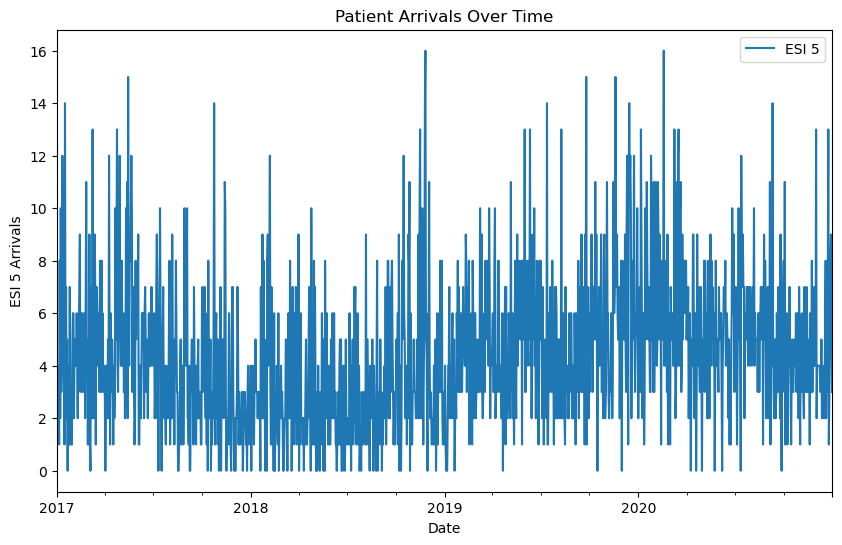

In [82]:
esi1_daily_df.plot(x='Date', y='ESI 5', figsize=(10, 6))
plt.title('Patient Arrivals Over Time')
plt.xlabel('Date')
plt.ylabel('ESI 5 Arrivals')
plt.show()

In [83]:
train_size = int(len(esi1_daily_df) * 0.9)  
train, test = esi1_daily_df.iloc[:train_size], esi1_daily_df.iloc[train_size:]

In [84]:
model = ExponentialSmoothing(train['ESI 5'], seasonal='add', seasonal_periods=7)
fitted_model = model.fit()

In [85]:
forecast_values = fitted_model.forecast(len(test))

In [86]:

for i, value in enumerate(forecast_values):
    print(f"Index {i}: {value}")



Index 0: 5.914825896690318
Index 1: 6.564578500634461
Index 2: 4.165559742290629
Index 3: 6.667017968230915
Index 4: 7.138228222441748
Index 5: 5.542715578215705
Index 6: 5.238254895506631
Index 7: 5.914825896690318
Index 8: 6.564578500634461
Index 9: 4.165559742290629
Index 10: 6.667017968230915
Index 11: 7.138228222441748
Index 12: 5.542715578215705
Index 13: 5.238254895506631
Index 14: 5.914825896690318
Index 15: 6.564578500634461
Index 16: 4.165559742290629
Index 17: 6.667017968230915
Index 18: 7.138228222441748
Index 19: 5.542715578215705
Index 20: 5.238254895506631
Index 21: 5.914825896690318
Index 22: 6.564578500634461
Index 23: 4.165559742290629
Index 24: 6.667017968230915
Index 25: 7.138228222441748
Index 26: 5.542715578215705
Index 27: 5.238254895506631
Index 28: 5.914825896690318
Index 29: 6.564578500634461
Index 30: 4.165559742290629
Index 31: 6.667017968230915
Index 32: 7.138228222441748
Index 33: 5.542715578215705
Index 34: 5.238254895506631
Index 35: 5.914825896690318
In

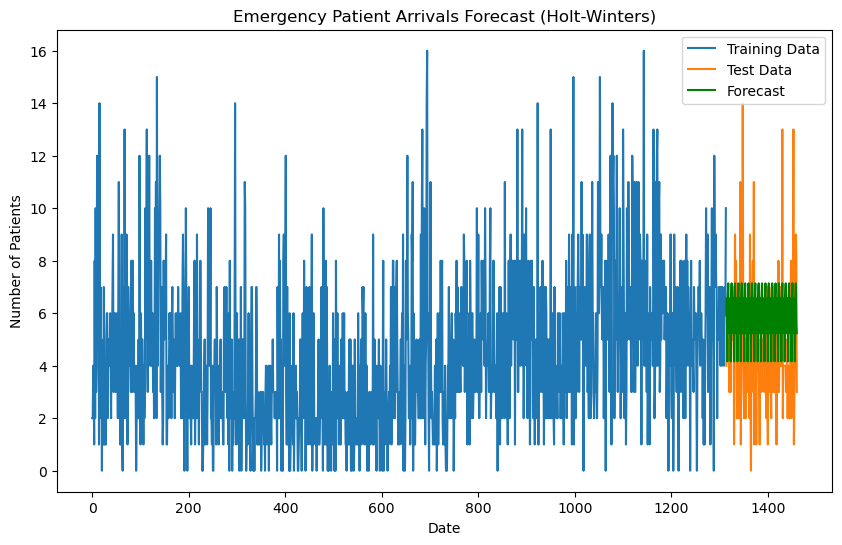

In [87]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['ESI 5'], label='Training Data')
plt.plot(test.index, test['ESI 5'], label='Test Data')
plt.plot(test.index, forecast_values, label='Forecast', color='green')
plt.title('Emergency Patient Arrivals Forecast (Holt-Winters)')
plt.xlabel('Date')
plt.ylabel('Number of Patients')
plt.legend()
plt.show()

In [88]:
rmse = np.sqrt(mean_squared_error(test['ESI 5'], forecast_values))
print("RMSE:", rmse)

RMSE: 2.58671163967798


In [89]:
import numpy as np

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))


mae = mean_absolute_error(test['ESI 5'], forecast_values)
print("MAE:", mae)

MAE: 2.095542083099049


In [96]:
for i, value in enumerate(test['ESI 5']):
    print(f"Index {i}: {value}")

Index 0: 4
Index 1: 6
Index 2: 5
Index 3: 5
Index 4: 5
Index 5: 5
Index 6: 3
Index 7: 6
Index 8: 6
Index 9: 3
Index 10: 5
Index 11: 6
Index 12: 7
Index 13: 5
Index 14: 6
Index 15: 7
Index 16: 1
Index 17: 5
Index 18: 9
Index 19: 5
Index 20: 8
Index 21: 6
Index 22: 2
Index 23: 5
Index 24: 5
Index 25: 7
Index 26: 2
Index 27: 2
Index 28: 4
Index 29: 11
Index 30: 1
Index 31: 4
Index 32: 4
Index 33: 4
Index 34: 14
Index 35: 5
Index 36: 3
Index 37: 2
Index 38: 5
Index 39: 5
Index 40: 2
Index 41: 3
Index 42: 6
Index 43: 5
Index 44: 3
Index 45: 7
Index 46: 5
Index 47: 5
Index 48: 2
Index 49: 9
Index 50: 3
Index 51: 0
Index 52: 5
Index 53: 7
Index 54: 7
Index 55: 8
Index 56: 3
Index 57: 11
Index 58: 1
Index 59: 4
Index 60: 2
Index 61: 6
Index 62: 1
Index 63: 5
Index 64: 4
Index 65: 4
Index 66: 7
Index 67: 4
Index 68: 3
Index 69: 1
Index 70: 4
Index 71: 5
Index 72: 4
Index 73: 3
Index 74: 4
Index 75: 5
Index 76: 4
Index 77: 4
Index 78: 6
Index 79: 3
Index 80: 4
Index 81: 6
Index 82: 6
Index 83: 2

In [98]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    # Find indices of zero values in y_true
    zero_indices = np.where(y_true == 0)[0]
    
    # Create a boolean mask to filter zero values
    mask = np.ones(len(y_true), dtype=bool)
    mask[zero_indices] = False
    
    # Filter y_true and y_pred using the mask
    y_true_filtered = y_true[mask]
    y_pred_filtered = y_pred[mask]
    
    # Calculate absolute percentage error
    absolute_errors = np.abs(y_true_filtered - y_pred_filtered)
    
    # Calculate percentage errors
    percentage_errors = absolute_errors / y_true_filtered
    
    # Calculate mean absolute percentage error
    mape = np.mean(percentage_errors) * 100
    return mape


mape = mean_absolute_percentage_error(test['ESI 5'], forecast_values)
print("MAPE:", mape)


MAPE: 71.70837001986989


In [99]:
import numpy as np

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))


mae = mean_absolute_error(test['ESI 5'], forecast_values)
print("MAE:", mae)

MAE: 2.095542083099049
